## Семестр 2. MLOps. Практическое задание №5 (vo_HW)

## Создание и подготовка данных

Для этой работы датасет будут созданы три датасета, на которых будет обучена и проверена модель линейной регрессии.

### Уставнока и импорт библиотек

In [3]:
!pip install ipython

In [4]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации

from sklearn.linear_model import SGDRegressor # Линейная регрессия с градиентным спуском от scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn
from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import PredictionErrorDisplay # Класс визуализации ошибок модели
from sklearn.preprocessing import scale

import cv2

import pickle
import os
import warnings
import ipytest

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

plt.style.use('dark_background')

### Генерация датасета #1

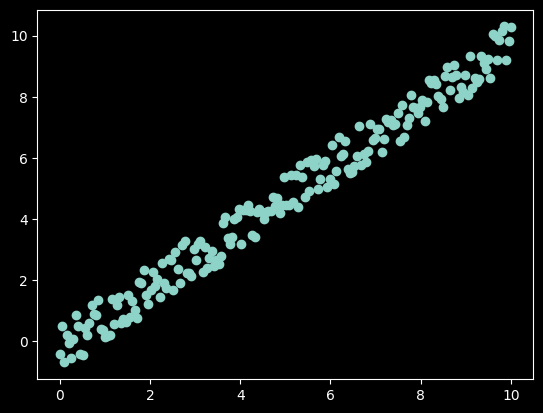

In [5]:
def df1_gen():
    xs = np.linspace(0, 10, 200)
    ys = xs + np.random.random(200)*1.5-1

    xs = xs.reshape(-1, 1)
    ys = ys.reshape(-1, 1)

    return xs, ys

xs, ys = df1_gen()

plt.scatter(xs, ys)
plt.show()

### Генерация датасета #2

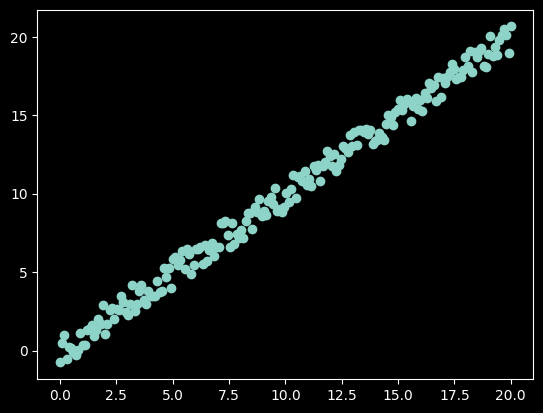

In [6]:
def df2_gen():
    xs2 = np.linspace(0, 20, 200)
    ys2 = xs2 + np.random.random(200)*2-1

    xs2 = xs2.reshape(-1, 1)
    ys2 = ys2.reshape(-1, 1)

    return xs2, ys2

xs2, ys2 = df2_gen()

plt.scatter(xs2, ys2)
plt.show()

### Генерация датасета #3

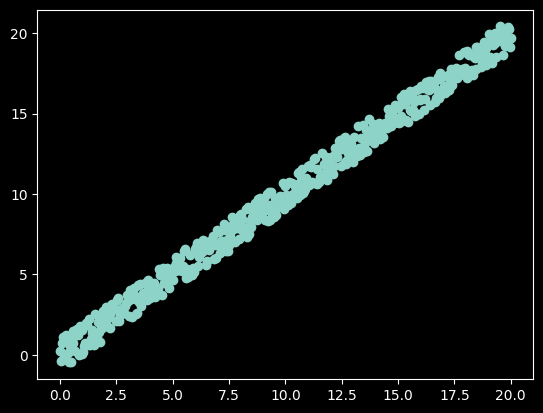

In [7]:
def df2_gen():
    xs3 = np.linspace(0, 20, 500)
    ys3 = xs3 + np.random.random(500)*2-1

    xs3 = xs3.reshape(-1, 1)
    ys3 = ys3.reshape(-1, 1)

    return xs3, ys3

xs3, ys3 = df2_gen()

plt.scatter(xs3, ys3)
plt.show()

### Генерация датасета #4 с шумами в данных

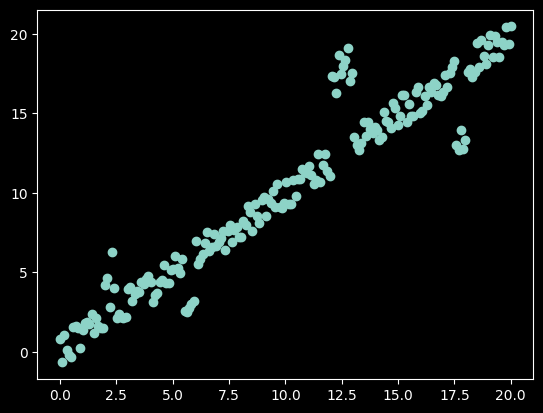

In [8]:
def df4_gen():
    xs4 = np.linspace(0, 20, 200)
    ys4 = xs4 + np.random.random(200)*2-1
    ys4[20:25] *= 2
    ys4[55:60] *= 0.5
    ys4[85:70] *= 0.7
    ys4[120:130] *= 1.4
    ys4[175:180] *= 0.75

    xs4 = xs4.reshape(-1, 1)
    ys4 = ys4.reshape(-1, 1)

    return xs4, ys4

xs4, ys4 = df4_gen()

plt.scatter(xs4, ys4)
plt.show()

### Функционя деления датасета на валидационную и тестовую выборки

In [9]:
def df_separate(x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  return x_train, x_test, y_train, y_test

## Обучение модели #1 на датасете #1

In [10]:
model1 = SGDRegressor(random_state = 42)

x_train1, x_test1, y_train1, y_test1 = df_separate(xs, ys)

x_train1 = x_train1.reshape(-1, 1)
y_train1 = y_train1.reshape(-1, 1)
x_test1 = x_test1.reshape(-1, 1)
y_test1 = y_test1.reshape(-1, 1)

model1.fit(x_train1, y_train1)


def save_model(model, file_name):
    try:
        if not os.path.isdir('model'):
            os.mkdir('model')
        pickle.dump(model, open('model/' + file_name + '.pkl', 'wb'))
        print("Model model/" + file_name + ".pkl saved successfully.")
    except IOError:
        print("Error uccured while saved model/" + file_name + ".pkl.")


save_model(model1, "model1")

Model model/model1.pkl saved successfully.


## Оценка работы модели #1

In [11]:
def calculate_metric(model_pipe, x, y, metric = r2_score, **kwargs):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    x: признаки
    y: истинные значения
    metric: метрика (r2 - по умолчанию)
    """
    y_model = model_pipe.predict(x)
    return metric(y, y_model, **kwargs)

print(f"r2 модели #1 на тренировочной выборке: {calculate_metric(model1, x_train1, y_train1):.4f}")
print(f"r2 модели #1 на валидационной выборке: {calculate_metric(model1, x_test1, y_test1):.4f}")

print(f"mse модели #1 на тренировочной выборке: {calculate_metric(model1, x_train1, y_train1, mse):.4f}")
print(f"mse модели #1 на валидационной выборке: {calculate_metric(model1, x_test1, y_test1, mse):.4f}")

print(f"rmse модели #1 на тренировочной выборке: {calculate_metric(model1, x_train1, y_train1, mse, squared = False):.4f}")
print(f"rmse модели #1 на валидационной выборке: {calculate_metric(model1, x_test1, y_test1, mse, squared = False):.4f}")

r2 модели #1 на тренировочной выборке: 0.9764
r2 модели #1 на валидационной выборке: 0.9723
mse модели #1 на тренировочной выборке: 0.2139
mse модели #1 на валидационной выборке: 0.2141
rmse модели #1 на тренировочной выборке: 0.4625
rmse модели #1 на валидационной выборке: 0.4627


Оценка работы модели #1 на данных с шумами

In [12]:
print(f"r2 модели #1 на данных с шумами: {calculate_metric(model1, xs4, ys4):.4f}")
print(f"mse модели #1 на данных с шумами: {calculate_metric(model1, xs4, ys4, mse):.4f}")
print(f"rmse модели #1 на данных с шумами: {calculate_metric(model1, xs4, ys4, mse, squared = False):.4f}")

r2 модели #1 на данных с шумами: 0.9181
mse модели #1 на данных с шумами: 2.8434
rmse модели #1 на данных с шумами: 1.6862


## Обучение модели #2 на датасете #2

In [13]:
model2 = SGDRegressor(random_state = 42)

x_train2, x_test2, y_train2, y_test2 = df_separate(xs2, ys2)

x_train2 = x_train2.reshape(-1, 1)
y_train2 = y_train2.reshape(-1, 1)
x_test2 = x_test2.reshape(-1, 1)
y_test2 = y_test2.reshape(-1, 1)

model2.fit(x_train2, y_train2)

save_model(model2, "model2")

Model model/model2.pkl saved successfully.


## Оценка работы модели #2

In [14]:
print(f"r2 модели #2 на тренировочной выборке: {calculate_metric(model2, x_train2, y_train2):.4f}")
print(f"r2 модели #2 на валидационной выборке: {calculate_metric(model2, x_test2, y_test2):.4f}")

print(f"mse модели #2 на тренировочной выборке: {calculate_metric(model2, x_train2, y_train2, mse):.4f}")
print(f"mse модели #2 на валидационной выборке: {calculate_metric(model2, x_test2, y_test2, mse):.4f}")

print(f"rmse модели #2 на тренировочной выборке: {calculate_metric(model2, x_train2, y_train2, mse, squared = False):.4f}")
print(f"rmse модели #2 на валидационной выборке: {calculate_metric(model2, x_test2, y_test2, mse, squared = False):.4f}")

r2 модели #2 на тренировочной выборке: 0.9910
r2 модели #2 на валидационной выборке: 0.9884
mse модели #2 на тренировочной выборке: 0.3316
mse модели #2 на валидационной выборке: 0.3596
rmse модели #2 на тренировочной выборке: 0.5759
rmse модели #2 на валидационной выборке: 0.5997


Оценка работы модели #2 на данных с шумами

In [15]:
print(f"r2 модели #2 на данных с шумами: {calculate_metric(model2, xs4, ys4):.4f}")
print(f"mse модели #2 на данных с шумами: {calculate_metric(model2, xs4, ys4, mse):.4f}")
print(f"rmse модели #2 на данных с шумами: {calculate_metric(model2, xs4, ys4, mse, squared = False):.4f}")

r2 модели #2 на данных с шумами: 0.9246
mse модели #2 на данных с шумами: 2.6160
rmse модели #2 на данных с шумами: 1.6174


## Обучение модели #3 на датасете #3

In [16]:
model3 = SGDRegressor(random_state = 42)

x_train3, x_test3, y_train3, y_test3 = df_separate(xs3, ys3)

x_train3 = x_train3.reshape(-1, 1)
y_train3 = y_train3.reshape(-1, 1)
x_test3 = x_test3.reshape(-1, 1)
y_test3 = y_test3.reshape(-1, 1)

model3.fit(x_train3, y_train3)

save_model(model3, "model3")

Model model/model3.pkl saved successfully.


Оценка работы модели #3 на данных с шумами

In [17]:
xs4, ys4 = df4_gen()

print(f"r2 модели #3 на данных с шумами: {calculate_metric(model3, xs4, ys4):.4f}")
print(f"mse модели #3 на данных с шумами: {calculate_metric(model3, xs4, ys4, mse):.4f}")
print(f"rmse модели #3 на данных с шумами: {calculate_metric(model3, xs4, ys4, mse, squared = False):.4f}")

r2 модели #3 на данных с шумами: 0.9358
mse модели #3 на данных с шумами: 2.2203
rmse модели #3 на данных с шумами: 1.4901


In [18]:
# import IPython

ipytest.autoconfig()


def test_t1():
    assert calculate_metric(model1, x_test1, y_test1, mse) < 1


def test_t2():
    assert calculate_metric(model2, x_test2, y_test2, mse) < 1


def test_t3():
    assert calculate_metric(model3, x_test3, y_test3, mse) < 1


def test_t4_noise():
    assert calculate_metric(model3, xs4, ys4, mse) < 1


ipytest.run('-v')

ModuleNotFoundError: No module named 'IPython.kernel'